In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**IMPORTING NECESSARY MODULES**

---



In [ ]:
import h5py
from keras.models import Model
from keras.layers import Input, Activation, Concatenate
from keras.layers import Flatten, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D
import numpy as np
import matplotlib.pyplot as plt
import theano
import cv2
import pdb
import os
import sys
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam

**SQUEEZENET MODEL**

---



In [ ]:
def SqueezeNet(nb_classes, inputs=(1, 48, 48)):
   
    input_img = Input(shape=inputs)

    conv1 = Convolution2D(96, (7, 7), activation='relu', kernel_initializer='glorot_uniform', strides=(2, 2), padding='same', name='conv1', data_format="channels_first")(input_img)
    maxpool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='maxpool1', data_format="channels_first")(conv1)

    fire2_squeeze = Convolution2D(16, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire2_squeeze', data_format="channels_first")(maxpool1)
    fire2_expand1 = Convolution2D(64, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire2_expand1', data_format="channels_first")(fire2_squeeze)
    fire2_expand2 = Convolution2D(64, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire2_expand2', data_format="channels_first")(fire2_squeeze)
    merge2 = Concatenate(axis=1)([fire2_expand1, fire2_expand2])

    fire3_squeeze = Convolution2D(16, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire3_squeeze', data_format="channels_first")(merge2)
    fire3_expand1 = Convolution2D(64, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire3_expand1', data_format="channels_first")(fire3_squeeze)
    fire3_expand2 = Convolution2D(64, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire3_expand2', data_format="channels_first")(fire3_squeeze)
    merge3 = Concatenate(axis=1)([fire3_expand1, fire3_expand2])

    fire4_squeeze = Convolution2D(32, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire4_squeeze', data_format="channels_first")(merge3)
    fire4_expand1 = Convolution2D(128, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire4_expand1', data_format="channels_first")(fire4_squeeze)
    fire4_expand2 = Convolution2D(128, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire4_expand2', data_format="channels_first")(fire4_squeeze)
    merge4 = Concatenate(axis=1)([fire4_expand1, fire4_expand2])
    maxpool4 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='maxpool4', data_format="channels_first")(merge4)

    fire5_squeeze = Convolution2D(32, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire5_squeeze', data_format="channels_first")(maxpool4)
    fire5_expand1 = Convolution2D(128, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire5_expand1', data_format="channels_first")(fire5_squeeze)
    fire5_expand2 = Convolution2D(128, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire5_expand2', data_format="channels_first")(fire5_squeeze)
    merge5 = Concatenate(axis=1)([fire5_expand1, fire5_expand2])

    fire6_squeeze = Convolution2D(48, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire6_squeeze', data_format="channels_first")(merge5)
    fire6_expand1 = Convolution2D(192, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire6_expand1', data_format="channels_first")(fire6_squeeze)
    fire6_expand2 = Convolution2D(192, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire6_expand2', data_format="channels_first")(fire6_squeeze)
    merge6 = Concatenate(axis=1)([fire6_expand1, fire6_expand2])

    fire7_squeeze = Convolution2D(48, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire7_squeeze', data_format="channels_first")(merge6)
    fire7_expand1 = Convolution2D(192, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire7_expand1', data_format="channels_first")(fire7_squeeze)
    fire7_expand2 = Convolution2D(192, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire7_expand2', data_format="channels_first")(fire7_squeeze)
    merge7 = Concatenate(axis=1)([fire7_expand1, fire7_expand2])

    fire8_squeeze = Convolution2D(64, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire8_squeeze', data_format="channels_first")(merge7)
    fire8_expand1 = Convolution2D(256, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire8_expand1', data_format="channels_first")(fire8_squeeze)
    fire8_expand2 = Convolution2D(256, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire8_expand2', data_format="channels_first")(fire8_squeeze)
    merge8 = Concatenate(axis=1)([fire8_expand1, fire8_expand2])
    maxpool8 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='maxpool8', data_format="channels_first")(merge8)

    fire9_squeeze = Convolution2D(64, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire9_squeeze', data_format="channels_first")(maxpool8)
    fire9_expand1 = Convolution2D(256, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire9_expand1', data_format="channels_first")(fire9_squeeze)
    fire9_expand2 = Convolution2D(256, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', name='fire9_expand2', data_format="channels_first")(fire9_squeeze)
    merge9 = Concatenate(axis=1)([fire9_expand1, fire9_expand2])

    fire9_dropout = Dropout(0.5, name='fire9_dropout')(merge9)
    conv10 = Convolution2D(nb_classes, (1, 1), activation='relu', kernel_initializer='glorot_uniform', padding='valid', name='conv10', data_format="channels_first")(fire9_dropout)

    global_avgpool10 = GlobalAveragePooling2D(data_format='channels_first')(conv10)
    softmax = Activation("softmax", name='softmax')(global_avgpool10)
    
    return Model(inputs=input_img, outputs=softmax)

In [ ]:
nb_classes= 7 #Various Types of Emotions
model = SqueezeNet(nb_classes)

**READING DATA FROM CSV FILE AND SPLITTING TRAINING AND TESTING DATA**

1.   List item

1.   List item
2.   List item


2.   List item



---



In [ ]:
with open("/content/drive/MyDrive/Innovation Practices/fer_mod.csv") as f:
  content = f.readlines()

lines = np.array(content)
num_of_instances = lines.size

y_train = []
y_test = []

X_train = []
X_test = []

for i in range(1,num_of_instances):
  emotion, img, usage = lines[i].split(",")
  val = img.split(" ")
  val = [int(i) for i in val if i!='']
  pix = np.array(val, 'float32')
  emotion = keras.utils.to_categorical(emotion, 7)
  if 'Training' in usage:
    X_train.append(pix)
    y_train.append(emotion)
  elif 'PublicTest' in usage:
    X_test.append(pix)
    y_test.append(emotion)

In [ ]:
X_train = np.array(X_train, 'float32')
y_train = np.array(y_train, 'float32')
X_test = np.array(X_test, 'float32')
y_test = np.array(y_test, 'float32')

In [ ]:
X_train/=255
X_test/=255

X_train = X_train.reshape(X_train.shape[0], 1, 48, 48)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 48, 48)
X_test = X_test.astype('float32')

In [ ]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_train.shape)
print(y_train.shape)

40166 train samples
9846 test samples
(40166, 1, 48, 48)
(40166, 7)


**DATA AUGMENTATION**

---



In [ ]:
batch_size = 256
data_gen = ImageDataGenerator(zoom_range=0.2, width_shift_range=0.1, height_shift_range = 0.1, horizontal_flip=True)
data_flow = data_gen.flow(X_train, y_train, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (40166, 1, 48, 48) (48 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


**COMPILING AND TRAINING THE MODEL**

---



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=2e-4), metrics=['acc',tf.keras.metrics.Precision(),
                                                                                            tf.keras.metrics.SpecificityAtSensitivity(0.5),
                                                                                            tf.keras.metrics.SensitivityAtSpecificity(0.5)])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 48, 48)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 96, 24, 24)   4800        input_1[0][0]                    
__________________________________________________________________________________________________
maxpool1 (MaxPooling2D)         (None, 96, 11, 11)   0           conv1[0][0]                      
__________________________________________________________________________________________________
fire2_squeeze (Conv2D)          (None, 16, 11, 11)   1552        maxpool1[0][0]                   
______________________________________________________________________________________________

In [ ]:
def lrdecay(epoch):
    lr = 2e-4
    if epoch > 70:
        lr *= 1e-3
    elif epoch > 60:
        lr *= 1e-2
    elif epoch > 55:
        lr *= 1e-1
    print('lr: ', lr)
    return lr
lrdecay = tf.keras.callbacks.LearningRateScheduler(lrdecay) # learning rate decay  

def earlystop(mode):
  if mode=='acc':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=15, mode='max')
  elif mode=='loss':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, mode='min')
  return estop

In [ ]:
history = model.fit(data_flow, epochs=100, steps_per_epoch=X_train.shape[0]/batch_size, callbacks=[lrdecay])

Epoch 1/70
lr:  0.0002
156/156 [==============================] - 51s 325ms/step - loss: 1.4816 - acc: 0.4329 - precision_2: 0.6721 - specificity_at_sensitivity: 0.8792 - sensitivity_at_specificity: 0.8852
Epoch 2/70
lr:  0.0002
156/156 [==============================] - 51s 325ms/step - loss: 1.4134 - acc: 0.4717 - precision_2: 0.6896 - specificity_at_sensitivity: 0.9015 - sensitivity_at_specificity: 0.9049
Epoch 3/70
lr:  0.0002
156/156 [==============================] - 51s 327ms/step - loss: 1.3572 - acc: 0.4969 - precision_2: 0.7066 - specificity_at_sensitivity: 0.9176 - sensitivity_at_specificity: 0.9184
Epoch 4/70
lr:  0.0002
156/156 [==============================] - 51s 326ms/step - loss: 1.3116 - acc: 0.5185 - precision_2: 0.7216 - specificity_at_sensitivity: 0.9307 - sensitivity_at_specificity: 0.9294
Epoch 5/70
lr:  0.0002
156/156 [==============================] - 51s 326ms/step - loss: 1.2719 - acc: 0.5321 - precision_2: 0.7283 - specificity_at_sensitivity: 0.9376 - sensi

**EVALUATING THE MODEL**

---



In [ ]:
train_score = model.evaluate(X_train, y_train, verbose=0)
train_parameters = ['Train accuracy:','Train Precision:','Train Specificity:','Train Sensitivity:']
print("Train Loss:",train_score[0])
for i in range(1,5):
  print(train_parameters[i-1],100*train_score[i])
print('\n')
 
test_score = model.evaluate(X_test, y_test, verbose=0)
test_parameters = ['Test accuracy:','Test Precision:','Test Specificity:','Test Sensitivity:']
print("Test Loss:",test_score[0])
for i in range(1,5):
  print(test_parameters[i-1],100*test_score[i])

Train Loss: 0.7523325681686401
Train accuracy: 72.59124517440796
Train Precision: 81.59202337265015
Train Specificity: 99.05558824539185
Train Sensitivity: 99.46721196174622


Test Loss: 0.9926071166992188
Test accuracy: 64.47288393974304
Test Precision: 73.88484477996826
Test Specificity: 97.80113697052002
Test Sensitivity: 97.43042588233948


**SAVING AND LOADING THE MODEL**

---



In [ ]:
model.save("/content/drive/MyDrive/Innovation Practices/squeezenet.h5") 

In [ ]:
from keras.models import load_model 
model = load_model("/content/drive/MyDrive/Innovation Practices/squeezenet.h5") 

train_score = model.evaluate(X_train, y_train, verbose=0)
train_parameters = ['Train accuracy:','Train Precision:','Train Specificity:','Train Sensitivity:']
print("Train Loss:",train_score[0])
for i in range(1,5):
  print(train_parameters[i-1],100*train_score[i])
print('\n')
 
test_score = model.evaluate(X_test, y_test, verbose=0)
test_parameters = ['Test accuracy:','Test Precision:','Test Specificity:','Test Sensitivity:']
print("Test Loss:",test_score[0])
for i in range(1,5):
  print(test_parameters[i-1],100*test_score[i])

Train Loss: 0.7523325681686401
Train accuracy: 72.59124517440796
Train Precision: 81.59202337265015
Train Specificity: 99.05558824539185
Train Sensitivity: 99.46721196174622


Test Loss: 0.9926072359085083
Test accuracy: 64.47288393974304
Test Precision: 73.88484477996826
Test Specificity: 97.80113697052002
Test Sensitivity: 97.43042588233948


**CLASSIFICATION REPORT**

---



In [ ]:
X_test_flattened = [np.argmax(i) for i in y_test]
X_test_flattened = np.array(X_test_flattened)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def classification(predictions): 
    nb_class_types = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    print("Classification Report:\n")
    cr=classification_report(X_test_flattened, np.argmax(np.round(predictions), axis=1), target_names=[nb_class_types[i] for i in range(len(nb_class_types))])
    print(cr)
    
squeezenet_pred = model.predict(X_test)
classification(squeezenet_pred)

Classification Report:

              precision    recall  f1-score   support

       angry       0.23      0.70      0.35       996
     disgust       0.74      0.22      0.34       116
        fear       0.53      0.20      0.29      1029
       happy       0.86      0.82      0.84      3004
         sad       0.53      0.26      0.35      1274
    surprise       0.80      0.64      0.71       912
     neutral       0.71      0.64      0.67      2515

    accuracy                           0.60      9846
   macro avg       0.63      0.50      0.51      9846
weighted avg       0.67      0.60      0.61      9846



**CONFUSION MATRIX**

---



Text(69.0, 0.5, 'Expected')

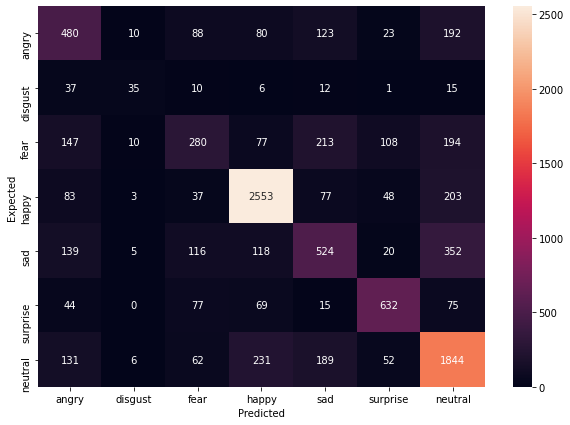

In [ ]:
nb_class_types = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
X_predicted = model.predict(X_test)
y_predicted = [np.argmax(i) for i in X_predicted]
cm = tf.math.confusion_matrix(labels=X_test_flattened,predictions=y_predicted)

plt.figure(figsize = (10,7))
sns_hmp = sns.heatmap(cm, annot=True, xticklabels = [nb_class_types[i] for i in range(len(nb_class_types))], yticklabels = [nb_class_types[i] for i in range(len(nb_class_types))], fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')

**TESTING AN IMAGE**

---



In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

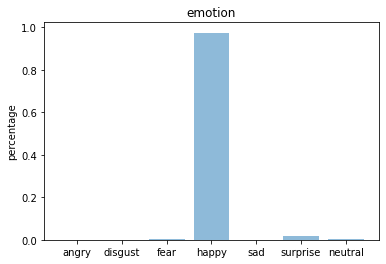

[1.0059604e-03 5.4380151e-05 5.6969039e-03 9.7436380e-01 7.8054471e-04
 1.6026333e-02 2.0720707e-03]
happiness


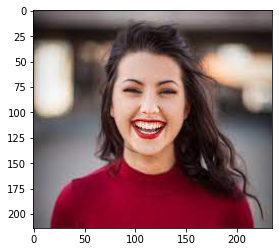

In [ ]:
import cv2
import math
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


d = {0:"angry",1:"disgust",2:"fear",3:"happiness",4:"sad",5:"surprise",6:"neutral"}
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Innovation Practices/haarcascade_frontalface_alt.xml')


file = '/content/drive/MyDrive/Innovation Practices/happy_down.jpg'
true_image = image.load_img(file)
img = cv2.imread(file)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.1,4)

if(len(faces) == 0):
    exit()

for (x,y,w,h) in faces:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
    start_row,end_row,start_col,end_col = y,y+h,x,x+h

croppedimage = gray[start_row:end_row,start_col:end_col]
img = cv2.resize(croppedimage,(48,48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

x = np.array(x, 'float32')
x = x.reshape(1, 1, 48, 48);

custom = model.predict(x)
emotion_analysis(custom[0])
print(custom[0])

emt = list(custom[0])
idx = emt.index(max(emt))
imgname = d[idx]
print(imgname)

plt.gray()
plt.imshow(true_image)
plt.show()

**TESTING A VIDEO**

---



In [ ]:
import math
from keras.preprocessing import image

videoFile = "/content/drive/MyDrive/Innovation Practices/v5.mp4"
vidcap = cv2.VideoCapture(videoFile)

def getFrame(seconds):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,seconds*1000)
    hasFrames,img = vidcap.read()
    
    if hasFrames:
        minutes = "00"
        hours = "00"
        if seconds >= 60:
            minutes = str(seconds//60)
            seconds = seconds % 60

        if int(minutes) >= 60:
            hours = str(int(minutes)//60)
            minutes = str(int(minutes) % 60)

        min = "{:02d}".format(int(minutes))
        sec = "{:02d}".format(seconds)
        hrs = "{:02d}".format(int(hours))

        flag = 0 
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.1,4)
        
        if(len(faces)==0):
            flag = 1
        
        if flag == 0 :

            global count
            count+=1

            for (x,y,w,h) in faces:
                cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
                start_row,end_row,start_col,end_col = y,y+h,x,x+h  
            
            croppedimage = gray[start_row:end_row,start_col:end_col]
            finalimg = cv2.resize(croppedimage,(48,48))

            x = image.img_to_array(finalimg)
            x = np.expand_dims(x, axis = 0)

            x /= 255
            x = np.array(x, 'float32')
            x = x.reshape(1, 1, 48, 48); 

            custom = model.predict(x)
            emt = list(custom[0])
            idx = emt.index(max(emt))
            imgname = d[idx]
            dcount[imgname] = dcount[imgname] + 1;
            
            cv2.imwrite("/content/drive/MyDrive/Innovation Practices/Detected/" + "%d_" % count + imgname +"__"+ hrs+":"+min+":"+sec+".jpg" ,img)  

    return hasFrames

d = {0:"angry",1:"disgust",2:"fear",3:"happiness",4:"sad",5:"surprise",6:"neutral"}
dcount = {"angry":0,"disgust":0,"fear":0,"happiness":0,"sad":0,"surprise":0,"neutral":0}

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Innovation Practices/haarcascade_frontalface_alt.xml')

sec = 0
frameRate = 2 #it will capture image in each 2 second
count=0
success = getFrame(sec)

while success:
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

print("Done")
print("Extracted images:",count)
for i in dcount:
  print(i,end=" ")
  print(dcount[i])

Done
Extracted images: 150
{'angry': 18, 'disgust': 0, 'fear': 12, 'happiness': 74, 'sad': 13, 'surprise': 17, 'neutral': 16}


In [ ]:
dcount = {'angry' : 18, 'disgust':0, 'fear':12, 'happiness':74, 'sad':13, 'surprise':17, 'neutral': 16}
print("Number of times a particular emotion is shown")
for i in dcount:
  print(i,end="-")
  print(dcount[i])

Number of times a particular emotion is shown
angry-18
disgust-0
fear-12
happiness-74
sad-13
surprise-17
neutral-16


**PLOTTING BAR CHART OF DETECTED EMOTIONS**

---




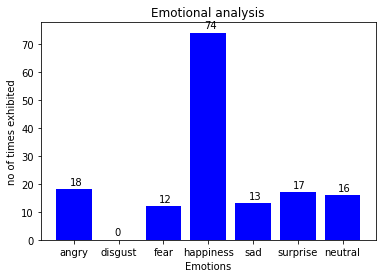

In [ ]:
emotions = list(dcount.keys())
values = list(dcount.values())

fig, ax = plt.subplots() 
width = 0.8
ind = np.arange(len(values)) 

plt.bar(emotions, values, width, color ='blue') 
        
for index, value in enumerate(values): 
    ax.text(index - 0.1, value + 1.5, str(value)) 
  
plt.xlabel("Emotions")
plt.ylabel("no of times exhibited")
plt.title("Emotional analysis")
plt.savefig('/content/drive/MyDrive/Innovation Practices/frequency.png', dpi=300, bbox_inches='tight')

plt.show()

**REPORT GENERATION**

In [ ]:
from docx import Document
from docx.shared import Inches
from docx.shared import RGBColor
from docx.shared import Pt
from docx.enum.text import WD_ALIGN_PARAGRAPH

document = Document()
p1 = document.add_paragraph()
paragraph_format = p1.paragraph_format
paragraph_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
p12 = p1.add_run("REPORT ON EMOTIONS PREDICTED")
f1 = p12.font
f1.size = Pt(16)
f1.underline = True
f1.bold = True

paragraph_format.line_spacing = 1.75

p2 = document.add_paragraph()
p22 = p2.add_run("Name of the video:")
f2 = p22.font
f2.name = 'Calibri'
f2.size = Pt(14)
f2.bold = True
p2.add_run(" video.mp4").font.size = Pt(13)


p3 = document.add_paragraph()
p32 = p3.add_run("Frames extracted link:")
f3 = p32.font
f3.name = 'Calibri'
f3.size = Pt(14)
f3.bold = True
document.add_paragraph('https://drive.google.com/drive/folders/1bbs1-qNfPEioGkDcFJlAN1XcipiVnYYL?usp=sharing')
document.add_paragraph("(Frames are extracted every 2 seconds)")

p4 = document.add_paragraph()
p42 = p4.add_run("Types of emotions predicted")
f4 = p42.font
f4.name = 'Calibri'
f4.size = Pt(14)
f4.bold = True
document.add_paragraph('Angry', style='List Bullet')
document.add_paragraph('Disgust', style='List Bullet')
document.add_paragraph('Fear', style='List Bullet')
document.add_paragraph('Happy', style='List Bullet')
document.add_paragraph('Sad', style='List Bullet')
document.add_paragraph('Surprise', style='List Bullet')
document.add_paragraph('Neutral', style='List Bullet')

p5 = document.add_paragraph()
p52 = p5.add_run("DETAILED ANALYSIS")
f5 = p52.font
f5.size = Pt(14)
f5.underline = True
f5.bold = True

p = document.add_paragraph()
p.add_run('Frequency graph:').bold = True
p.add_run(" No of times the person exhibited a particular emotion")

document.add_picture('/content/drive/MyDrive/Innovation Practices/frequency.png', width=Inches(5.25))
document.save('/content/drive/MyDrive/Innovation Practices/emotion_report.docx')